In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_excel(r"C:\Users\Himanshu Shekhar\Downloads\Dataset_Identify customer segments for online retail with the use of K-means clustering\Online Retail.xlsx")

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [11]:
missing=round(df.isnull().mean()*100,2)

In [13]:
missing

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [13]:
df=df.dropna()
df.shape

(406829, 8)

In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [17]:
df['Amount']=df['Quantity']*df['UnitPrice']

In [19]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [21]:
grouped_df=df.groupby('CustomerID')[['Amount']].sum().reset_index()

In [23]:
grouped_df.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [25]:
frequency=df.groupby('CustomerID')[['InvoiceNo']].count().reset_index()

In [27]:
frequency.columns=['CustomerID','Frequency']

In [29]:
frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [31]:
grouped_df=pd.merge(grouped_df,frequency,on='CustomerID',how='inner')
grouped_df.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [33]:
grouped_df.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [35]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [37]:
max_date=max(df['InvoiceDate'])

In [39]:
max_date

Timestamp('2011-12-09 12:50:00')

In [41]:
df['Diff']=max_date-df['InvoiceDate']

In [43]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [45]:
last_purchase=df.groupby('CustomerID')[['Diff']].min().reset_index()

In [47]:
last_purchase.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [49]:
last_purchase.columns=['CustomerID','Recency']
last_purchase.head()

,CustomerID,Recency
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [51]:
grouped_df=pd.merge(grouped_df,last_purchase,on='CustomerID',how='inner')

In [53]:
grouped_df.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [55]:
grouped_df['Recency']=grouped_df['Recency'].dt.days

In [57]:
grouped_df.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


{'whiskers': [<matplotlib.lines.Line2D at 0x212a988bf50>,
 'caps': [<matplotlib.lines.Line2D at 0x212a9889d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x2129f83fe30>],
 'medians': [<matplotlib.lines.Line2D at 0x212a988afc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x212a68a40b0>],
 'means': []}

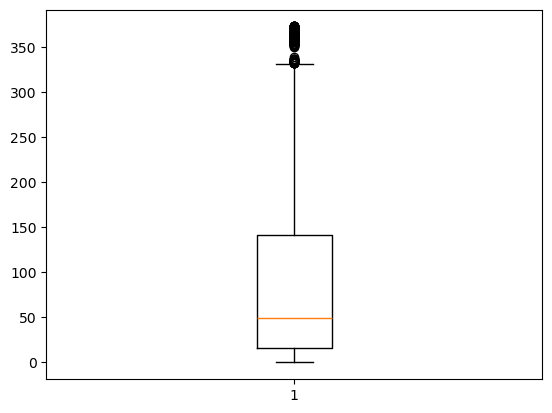

In [59]:
plt.boxplot(grouped_df['Recency'])

In [61]:
grouped_df.shape

(4372, 4)

In [63]:
Q1 = grouped_df.Amount.quantile(0.05)
Q3 = grouped_df.Amount.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.Amount >= Q1 - 1.5*IQR) & (grouped_df.Amount <= Q3 + 1.5*IQR)]


Q1 = grouped_df.Recency.quantile(0.05)
Q3 = grouped_df.Recency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.Recency >= Q1 - 1.5*IQR) & (grouped_df.Recency <= Q3 + 1.5*IQR)]


Q1 = grouped_df.Frequency.quantile(0.05)
Q3 = grouped_df.Frequency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.Frequency >= Q1 - 1.5*IQR) & (grouped_df.Frequency <= Q3 + 1.5*IQR)]

In [65]:
rfm=grouped_df[['Amount','Frequency','Recency']]
scaler=StandardScaler()
rfm_scaled=scaler.fit_transform(rfm)

In [67]:
rfm_scaled.shape

(4293, 3)

In [69]:
rfm_scaled=pd.DataFrame(rfm_scaled,columns=['Amount','Frequency','Recency'])

In [71]:
rfm_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [73]:
WCSS=[]
no_clusters=[2,3,4,5,6,7,8,9]
for i in no_clusters:
    kmeans=KMeans(n_clusters=i,max_iter=50,init='k-means++',random_state=50)
    kmeans.fit(rfm_scaled)
    WCSS.append(kmeans.inertia_)

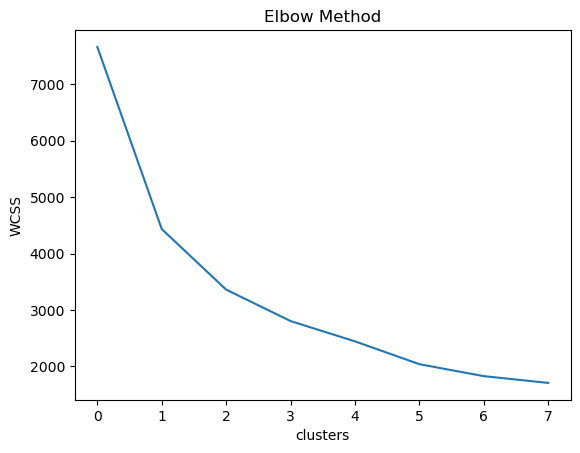

In [75]:
plt.plot(WCSS)
plt.title('Elbow Method')
plt.xlabel('clusters')
plt.ylabel('WCSS')
plt.show()

In [77]:
no_clusters=[2,3,4,5,6,7,8,9]
for i in no_clusters:
    kmeans=KMeans(n_clusters=i,max_iter=50,init='k-means++',random_state=50)
    kmeans.fit(rfm_scaled)
    cluster_labels=kmeans.labels_
    score=silhouette_score(rfm_scaled,cluster_labels)
    print("For no_clusters={0}, the silhouette score is {1}".format(i, score))

For no_clusters=2, the silhouette score is 0.5389790406760827
For no_clusters=3, the silhouette score is 0.5084896296141937
For no_clusters=4, the silhouette score is 0.4777820100216849
For no_clusters=5, the silhouette score is 0.46339970689130344
For no_clusters=6, the silhouette score is 0.435599362192813
For no_clusters=7, the silhouette score is 0.41481670613813887
For no_clusters=8, the silhouette score is 0.3879594558057553
For no_clusters=9, the silhouette score is 0.35293135149994187


In [79]:
kmeans=KMeans(n_clusters=3,max_iter=50,init='k-means++',random_state=50)
kmeans.fit(rfm_scaled)

KMeans(max_iter=50, n_clusters=3, random_state=50)

In [81]:
grouped_df['Cluster_id']=kmeans.labels_

In [83]:
grouped_df.head()

,CustomerID,Amount,Frequency,Recency,Cluster_id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,1


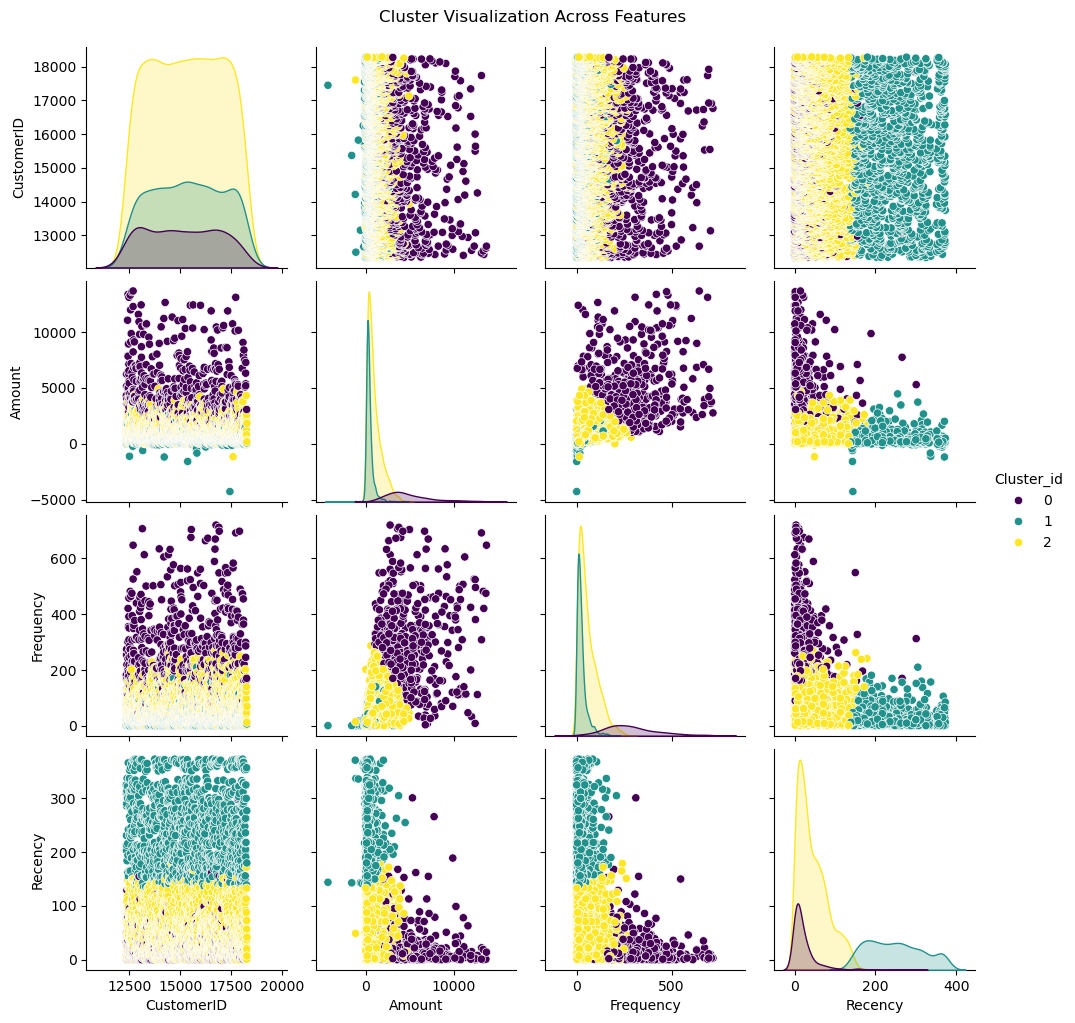

In [85]:
sns.pairplot(grouped_df, hue="Cluster_id", palette="viridis", diag_kind="kde")
plt.suptitle("Cluster Visualization Across Features", y=1.02)
plt.show()

In [87]:
cluster_mean = grouped_df.groupby("Cluster_id").mean()
cluster_median = grouped_df.groupby("Cluster_id").median()
cluster_std = grouped_df.groupby("Cluster_id").std()
print("Cluster Means:\n", cluster_mean)
print("\nCluster Medians:\n", cluster_median)
print("\nCluster Standard Deviations:\n", cluster_std)


Cluster Means:
               CustomerID       Amount   Frequency     Recency
Cluster_id                                                   
0           15096.749499  4898.735571  286.891784   21.703407
1           15374.142322   388.568259   25.502809  248.295880
2           15308.001467   951.730177   59.516141   44.497799

Cluster Medians:
             CustomerID    Amount  Frequency  Recency
Cluster_id                                          
0              15058.0  4122.280      265.0     10.0
1              15362.0   288.920       17.0    244.5
2              15314.0   691.135       45.0     34.0

Cluster Standard Deviations:
              CustomerID       Amount   Frequency    Recency
Cluster_id                                                 
0           1752.358430  2658.753128  140.628896  32.434367
1           1720.433277   475.756696   27.461023  67.259213
2           1716.283060   810.332118   50.142289  37.010425


In [89]:
cluster_summary = grouped_df.groupby("Cluster_id").agg(
    Recency_mean=("Recency", "mean"),
    Recency_median=("Recency", "median"),
    Recency_std=("Recency", "std"),
    
    Frequency_mean=("Frequency", "mean"),
    Frequency_median=("Frequency", "median"),
    Frequency_std=("Frequency", "std"),
    
    Amount_mean=("Amount", "mean"),
    Amount_median=("Amount", "median"),
    Amount_std=("Amount", "std")
)

print(cluster_summary)


            Recency_mean  Recency_median  Recency_std  Frequency_mean  \
Cluster_id                                                              
0              21.703407            10.0    32.434367      286.891784   
1             248.295880           244.5    67.259213       25.502809   
2              44.497799            34.0    37.010425       59.516141   

            Frequency_median  Frequency_std  Amount_mean  Amount_median  \
Cluster_id                                                                
0                      265.0     140.628896  4898.735571       4122.280   
1                       17.0      27.461023   388.568259        288.920   
2                       45.0      50.142289   951.730177        691.135   

             Amount_std  
Cluster_id               
0           2658.753128  
1            475.756696  
2            810.332118  


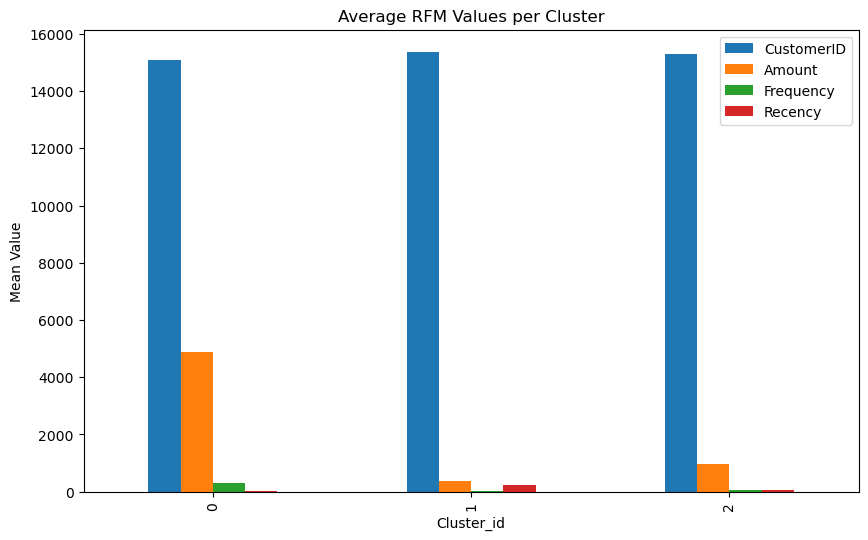

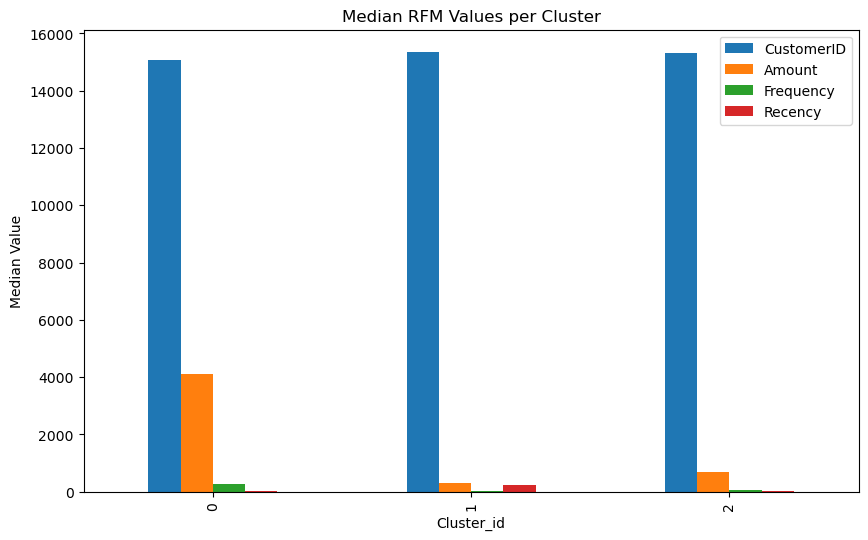

In [91]:
cluster_mean.plot(kind="bar", figsize=(10,6))
plt.title("Average RFM Values per Cluster")
plt.ylabel("Mean Value")
plt.show()
cluster_median.plot(kind="bar", figsize=(10,6))
plt.title("Median RFM Values per Cluster")
plt.ylabel("Median Value")
plt.show()


<Axes: xlabel='Cluster_id', ylabel='Amount'>

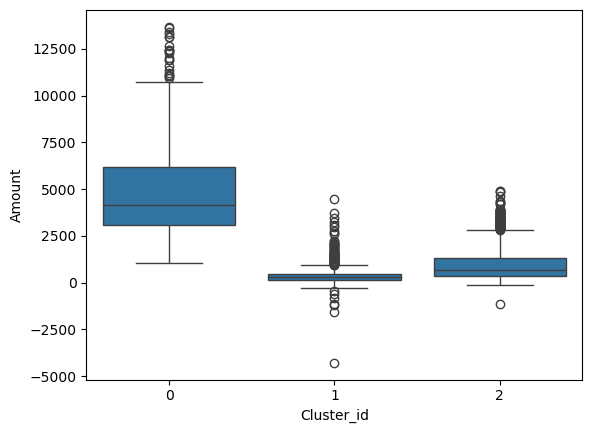

In [93]:
sns.boxplot(x='Cluster_id',y='Amount',data=grouped_df)

<Axes: xlabel='Cluster_id', ylabel='Frequency'>

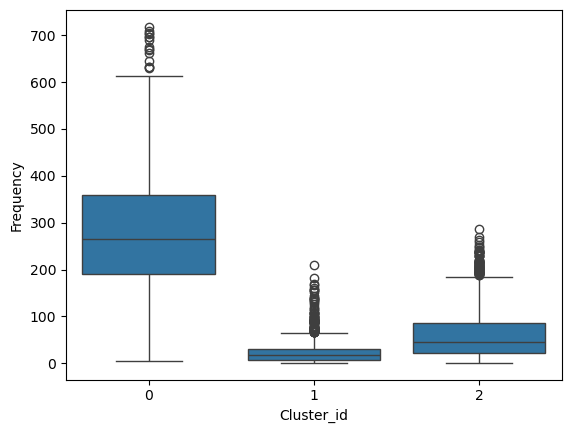

In [95]:
sns.boxplot(x='Cluster_id',y='Frequency',data=grouped_df)

<Axes: xlabel='Cluster_id', ylabel='Recency'>

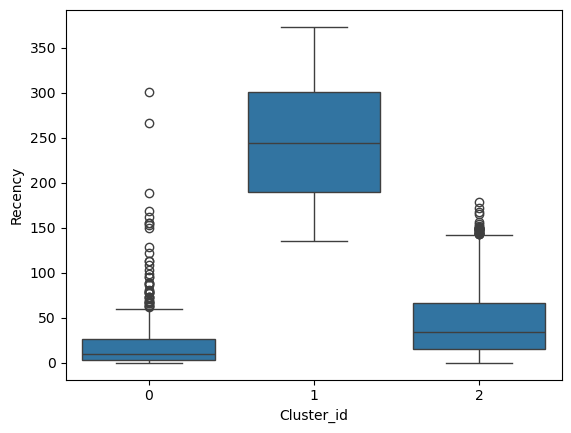

In [97]:
sns.boxplot(x='Cluster_id',y='Recency',data=grouped_df)